In [2]:
from dish.simulator import Simulator

model = Simulator('gene_expression.xlsx')

def benchmark(iterations: int):
    model.run_simulation('sync', 1, iterations, f'bench-gene-expression-{iterations}.txt', 16, 2)

steps = range(16)
for iterations in [2**s for s in steps]:
    print(f'Running: {iterations:7d} ', end='')
    %timeit benchmark(iterations)

Running:       1 153 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Running:       2 269 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Running:       4 419 µs ± 6.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Running:       8 694 µs ± 4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Running:      16 1.27 ms ± 11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Running:      32 2.41 ms ± 49.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running:      64 4.64 ms ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running:     128 9.23 ms ± 76.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running:     256 18.2 ms ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running:     512 36.6 ms ± 660 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Running:    1024 72.3 ms ± 453 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Running:    2048 144 ms 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('gene-exp-summary.csv', sep=',', header=0, index_col=0)

In [38]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

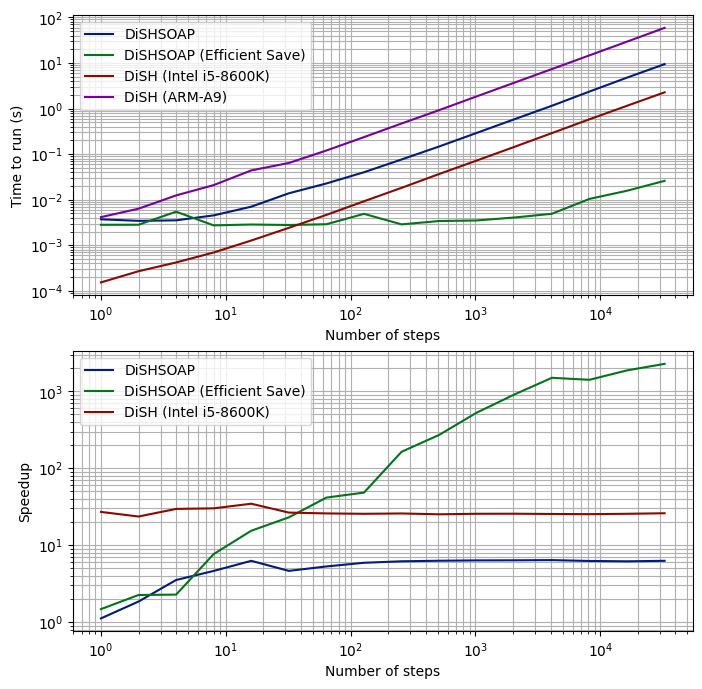

In [55]:
import matplotlib.ticker as ticker

with plt.style.context('seaborn-dark-palette'):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
    ax1.loglog(df['fastdish_time'],         label='DiSHSOAP')
    ax1.loglog(df['fastdish_pickled_time'], label='DiSHSOAP (Efficient Save)')
    ax1.loglog(df['dish_intel_time'],       label='DiSH (Intel i5-8600K)')
    ax1.loglog(df['dish_time'],             label='DiSH (ARM-A9)')
    ax1.set_ylabel('Time to run (s)')

    df['fastdish_norm']         = df['dish_time'] / df['fastdish_time']
    df['fastdish_pickled_norm'] = df['dish_time'] / df['fastdish_pickled_time']
    df['dish_intel_norm']       = df['dish_time'] / df['dish_intel_time']

    ax2.loglog(df['fastdish_norm'],         label='DiSHSOAP')
    ax2.loglog(df['fastdish_pickled_norm'], label='DiSHSOAP (Efficient Save)')
    ax2.loglog(df['dish_intel_norm'],       label='DiSH (Intel i5-8600K)')
    ax2.set_ylabel('Speedup')

    for ax in (ax1, ax2):
        ax.legend()
        ax.grid(which='both')
        ax.set_xlabel('Number of steps')

    
    plt.savefig('plots.pdf')
    plt.show()